<a href="https://colab.research.google.com/github/baudouinMartelee/CC/blob/master/CrowdCountingStage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projet Crowd Counting

#### Author : Baudouin Martelee
#### Company : UCL
#### Context : Internship




*Import content of your Google Drive*



In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


*Clone git to access the project*

In [4]:
!git clone https://github.com/baudouinMartelee/CC.git


Cloning into 'CC'...
remote: Enumerating objects: 415, done.
remote: Counting objects: 100% (415/415), done.
remote: Compressing objects: 100% (320/320), done.
remote: Total 415 (delta 196), reused 290 (delta 91), pack-reused 0
Receiving objects: 100% (415/415), 7.50 MiB | 25.93 MiB/s, done.
Resolving deltas: 100% (196/196), done.


*Install the package CC to use the different fonction of the project from the github*

In [5]:
!pip install git+https://github.com/baudouinMartelee/CC.git --upgrade

  Cloning https://github.com/baudouinMartelee/CC.git to /tmp/pip-req-build-nwh0m27m
  Running command git clone -q https://github.com/baudouinMartelee/CC.git /tmp/pip-req-build-nwh0m27m
  Created wheel for CrowdCountingStage: filename=CrowdCountingStage-0.0.1-cp36-none-any.whl size=14868 sha256=094d711086f1fbdeed860483854523a5c7ebc4c7b8c93bacc9ad6f9313042b45
  Stored in directory: /tmp/pip-ephem-wheel-cache-kmwe16pb/wheels/af/f2/52/81f5361982a94f63a4df8554cca52a376bf706985a77af2172
Successfully built CrowdCountingStage


##Case 1: train with your own data 
 
#### For this section, you must have a directory of your image divided in 2 sections : train_data and test_data and a json file that contains the name of image and the groundtruth associated.
####In my exemple the directory's name is Croix du sud

```
project
  
│
└───Croix du sud
│   │
│   │
│   └─── train_data
│   │   │   img1.png
│   │   │   img2.png
│   │   │   ...
│   │
│   └─── test_data
│       │   img1.png
│       │   img2.png
│       │   ...
└
```


* First step : import data from the json file

In [6]:
cd ./CC

/content/CC


In [11]:
import CC 

jsonfile = open('/content/gdrive/My Drive/Dataset/Croix du Sud/train_data/dataset_audit.json')

data = CC.import_data(jsonfile)
print(data)

{'L_SC13B-00_V01_Auditoire SUD 08_14-02-20_10_53_16.jpg':         x     y
0    1393  1335
1    2128  1730
2    2206  1438
3    2381  1370
4    1957  1340
..    ...   ...
150  2310   572
151  2287   531
152  2164   506
153  2159   470
154  2270   677

[155 rows x 2 columns], 'L_SC13B-00_V01_Auditoire SUD 08_19-02-20_14_49_21.jpg':        x    y
0   1017  750
1    703  366
2    848  412
3    910  376
4    960  371
5    969  126
6   1086  296
7   1136  289
8   1197  266
9   1287  188
10  1356  230
11  1361  199
12  1454  203
13  1567  217
14  1757  269
15  1773  304
16  1301  268
17  1281  291
18  1416  289
19  1413  326
20  1288  359
21  1246  380
22  1213  399
23  1160  427
24  1119  444
25  1344  470
26  1407  381
27  1447  350
28  1613  354
29  1596  376
30  1599  406
31  1503  441
32  1579  546
33  1610  527
34  1632  493
35  1845  458
36  1829  437
37  1850  420
38  1841  371
39  1961  419
40  2375  793
41  2297  965
42  2122  849
43  2076  561
44  2105  556
45  2079  522
46  1947  

* Second step : get a list of images to train

In [12]:
import os

root = '/content/gdrive/My Drive/Dataset'
image_directory = os.path.join(root, 'Croix du Sud/train_data')

list_img_paths = CC.getPaths(image_directory)
print(list_img_paths)

['/content/gdrive/My Drive/Dataset/Croix du Sud/train_data/L_SC13B-00_V02_Auditoire SUD 09_19-02-20_13_57_40.jpg', '/content/gdrive/My Drive/Dataset/Croix du Sud/train_data/L_SC13B-01_V03_Auditoire SUD 18_14-02-20_13_01_01.jpg', '/content/gdrive/My Drive/Dataset/Croix du Sud/train_data/L_SC13B-00_V01_Auditoire SUD 08_14-02-20_10_53_16.jpg', '/content/gdrive/My Drive/Dataset/Croix du Sud/train_data/L_SC13B-00_V01_Auditoire SUD 08_19-02-20_13_57_40.jpg', '/content/gdrive/My Drive/Dataset/Croix du Sud/train_data/L_SC13B-00_V02_Auditoire SUD 09_19-02-20_14_30_25.jpg', '/content/gdrive/My Drive/Dataset/Croix du Sud/train_data/L_SC13B-01_V03_Auditoire SUD 18_14-02-20_14_25_49.jpg', '/content/gdrive/My Drive/Dataset/Croix du Sud/train_data/L_SC13B-01_V04_Auditoire SUD 19_14-02-20_14_25_49.jpg', '/content/gdrive/My Drive/Dataset/Croix du Sud/train_data/L_SC13B-01_V04_Auditoire SUD 19_19-02-20_14_49_46.jpg', '/content/gdrive/My Drive/Dataset/Croix du Sud/train_data/2.jpg', '/content/gdrive/My D

* Third step : Generation of the density map 

1rst argument : list of image path

2nd argument : dictionary (key : img name, value : (x,y) coordinates of head (groundtruth))

In [13]:
dict_img_path_gt = CC.generate_density_map(list_img_paths,data)
print(dict_img_path_gt)

Generation des densités et dictionnaire
{'/content/gdrive/My Drive/Dataset/Croix du Sud/train_data/L_SC13B-00_V02_Auditoire SUD 09_19-02-20_13_57_40.jpg': array([[4.0462469e-09, 4.0604147e-09, 4.0745758e-09, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.0976902e-09, 4.1120378e-09, 4.1263792e-09, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.1497303e-09, 4.1642600e-09, 4.1787835e-09, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.2617005e-09, 1.2661182e-09, 1.2705340e-09, ..., 1.6394868e-08,
        1.6118769e-08, 1.5846883e-08],
       [1.2443450e-09, 1.2487019e-09, 1.2530570e-09, ..., 1.6322653e-08,
        1.6047769e-08, 1.5777083e-08],
       [1.2272113e-09, 1.2315083e-09, 1.2358033e-09, ..., 1.6250310e-08,
        1.5976644e-08, 1.5707156e-08]], dtype=float32), '/content/gdrive/My Drive/Dataset/Croix du Sud/train_data/L_SC13B-01_V03_Auditoire SUD 18_14-02-20_13_01_01.jpg': array([[0., 0., 0., ..., 0., 0

* Fourth step : Split data into training and validation

1rst argument : dictionary (key : img path, value : density map)

2nd argument : percentage of splitting into train set and validation set 

exemple : 80 -> 80% of data in training set and 20% in validation set

In [14]:
dico_train, dico_validation = CC.split_data(dict_img_path_gt, 80) 
print(dico_train)
print(dico_validation)

Split du dico en train et validation
{'/content/gdrive/My Drive/Dataset/Croix du Sud/train_data/L_SC13B-00_V02_Auditoire SUD 09_19-02-20_13_57_40.jpg': array([[4.0462469e-09, 4.0604147e-09, 4.0745758e-09, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.0976902e-09, 4.1120378e-09, 4.1263792e-09, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.1497303e-09, 4.1642600e-09, 4.1787835e-09, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.2617005e-09, 1.2661182e-09, 1.2705340e-09, ..., 1.6394868e-08,
        1.6118769e-08, 1.5846883e-08],
       [1.2443450e-09, 1.2487019e-09, 1.2530570e-09, ..., 1.6322653e-08,
        1.6047769e-08, 1.5777083e-08],
       [1.2272113e-09, 1.2315083e-09, 1.2358033e-09, ..., 1.6250310e-08,
        1.5976644e-08, 1.5707156e-08]], dtype=float32), '/content/gdrive/My Drive/Dataset/Croix du Sud/train_data/L_SC13B-01_V03_Auditoire SUD 18_14-02-20_13_01_01.jpg': array([[0., 0., 0., ..., 0., 0., 

* Creation of loaders for using data in pytorch to train the model

Importation of data to pytorch

1rst argument : list paths of images in training set

2nd argument : list paths of images in validation set

3rd argument : dictionary (key : img path, value : density map)

4th argument : batch_size



In [0]:
train_loader, validation_loader = CC.pytorch_loader(list(dico_train.keys()), list(dico_validation.keys()), dict_img_path_gt, 1)

* Training of model 

1rst argument : train loader

2nd argument : validation loader

3rd argument : number of epoch

4th argument : learning rate

5th argument : path of .pth.tar file

In [16]:
CC.train(train_loader, validation_loader, num_epoch= 30, learning_rate= 1e-7, pthFilePath='/content/gdrive/My Drive/Dataset/test_30epoch_lr7.pth.tar')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth



Nombre total de params 16263489
Epoch n° 0
Loss for epoch 0 : tensor(0.0001, device='cuda:0')
 * MAE 0.26382145285606384
Best mae : 0.26382145285606384
Epoch n° 1
Loss for epoch 1 : tensor(0.0001, device='cuda:0')
 * MAE 0.2729072570800781
Best mae : 0.26382145285606384
Epoch n° 2
Loss for epoch 2 : tensor(0.0001, device='cuda:0')
 * MAE 0.2644374668598175
Best mae : 0.26382145285606384
Epoch n° 3
Loss for epoch 3 : tensor(0.0001, device='cuda:0')
 * MAE 0.26462385058403015
Best mae : 0.26382145285606384
Epoch n° 4
Loss for epoch 4 : tensor(0.0001, device='cuda:0')
 * MAE 0.2604129910469055
Best mae : 0.2604129910469055
Epoch n° 5
Loss for epoch 5 : tensor(0.0001, device='cuda:0')
 * MAE 0.2648821473121643
Best mae : 0.2604129910469055
Epoch n° 6
Loss for epoch 6 : tensor(0.0001, device='cuda:0')
 * MAE 0.2654126286506653
Best mae : 0.2604129910469055
Epoch n° 7
Loss for epoch 7 : tensor(0.0001, device='cuda:0')
 * MAE 0.2626330256462097
Best mae : 0.2604129910469055
Epoch n° 8
Loss f

* Predition of an image with the best model

1st argument: path of the image

2nd argument: path of the pth file

Model evaluation
/content/gdrive/My Drive/Dataset/Croix du Sud/test_data/L_SC13B-00_V01_Auditoire SUD 08_19-02-20_14_49_21.jpg
model loaded
Predicted Count :  45


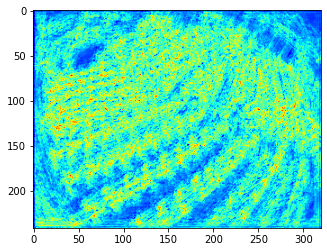

In [0]:
CC.predict('/content/gdrive/My Drive/Dataset/Croix du Sud/test_data/L_SC13B-00_V01_Auditoire SUD 08_19-02-20_14_49_21.jpg','/content/gdrive/My Drive/test_epoch34_lr6.pth.tar')

## Case 2 : use the default trained model

this model was trained on 12 images that comes from 4 differents auditoriums in UCL ( SUD )


* Prediction of an image 

* 2 arguments : 
the first is the image path 
the second is the .pth.tar file path


Model evaluation
/content/gdrive/My Drive/Dataset/Croix du Sud/test_data/L_SC13B-01_V03_Auditoire SUD 18_14-02-20_11_57_56.jpg
model loaded
Predicted Count :  47


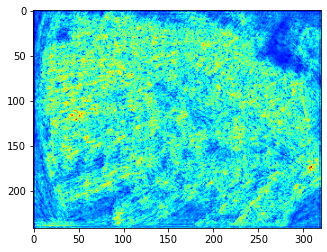

In [9]:
  CC.predict('/content/gdrive/My Drive/Dataset/Croix du Sud/test_data/L_SC13B-01_V03_Auditoire SUD 18_14-02-20_11_57_56.jpg','/content/gdrive/My Drive/test_epoch34_lr6.pth.tar')

Model evaluation
/content/gdrive/My Drive/Stage/Dataset/Croix du Sud/test_data/L_SC13B-01_V03_Auditoire SUD 18_14-02-20_11_57_56.jpg
model loaded
Predicted Count :  47


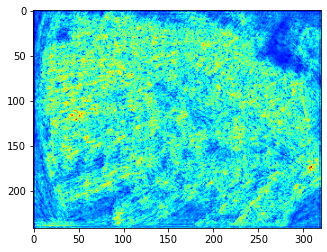

Original Count :  144


Original Image


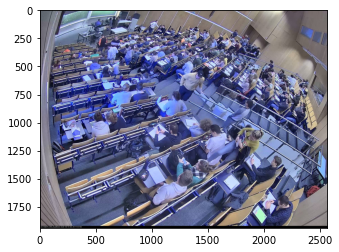

In [0]:
CC.predict_img_test('/content/gdrive/My Drive/Stage/Dataset/Croix du Sud/test_data/L_SC13B-01_V03_Auditoire SUD 18_14-02-20_11_57_56.jpg','/content/gdrive/My Drive/test_epoch34_lr6.pth.tar','/content/CC/CC/dataset_audit.json')